# Longterm Analysis

In [1]:
import os
import sys

from matplotlib import pyplot as plt
import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import pickle
import scipy
import seaborn as sns
import progressbar

from Noise_Interferometry.Modules import analysis

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [29]:
import matlab.engine
eng = matlab.engine.start_matlab()

## Generate NCCFs_array variable

In [14]:
file_name = "/Volumes/Ocean_Acoustics/NCCFs/MJ03F-MJ03E/all_years"
exp1 = analysis.NCCF_experiment(file_name, verbose=False)

NCCFs = exp1.MA_TDGF(201,1,start_hour=41000,end_hour=42000)

[======================================================================= ]  98%

## Getting Manually Specified Peaks

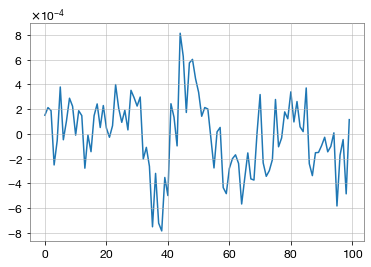

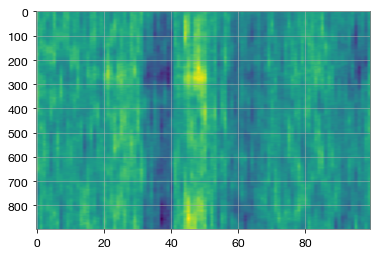

In [4]:
peak_slice = NCCFs.peaks['dA']
# plt.imshow(peak_slice, aspect='auto')
plt.plot(peak_slice[50,:])

plt.figure()
plt.imshow(peak_slice,aspect='auto')

## Phase Analysis

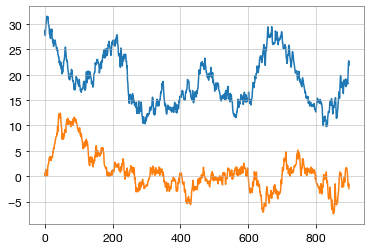

In [126]:
peak = 's1b0'

phaseA = NCCFs.phase_of_peak(peak+'A')
phaseB = NCCFs.phase_of_peak(peak+'B')
plt.plot(np.unwrap(phaseA))
plt.plot(np.unwrap(phaseB))

## SNR Analysis

In [100]:
year = '2017'

# Generate NCCFs_array variable:
file_name = "/Users/jhrag/Code/Noise_Interferometry/NCFs/MJ03F-MJ03E/"+year
exp1 = analysis.NCCF_experiment(file_name, verbose=False)
NCCFs = exp1.MA_TDGF(101,1,start_hour=0,end_hour=1000)

[======================================================================= ]  98%

[slice(5535, 5635, None), slice(5303, 5503, None), slice(4969, 5169, None), slice(4622, 4782, None), slice(6367, 6467, None), slice(6498, 6698, None), slice(6833, 7033, None), slice(7242, 7402, None)]


/Users/jhrag/Code/Noise_Interferometry/Modules/analysis.py:1065: UserWarning: Peak index jumps more than 3 in single step
  return SNR, peak_idx, noise_std


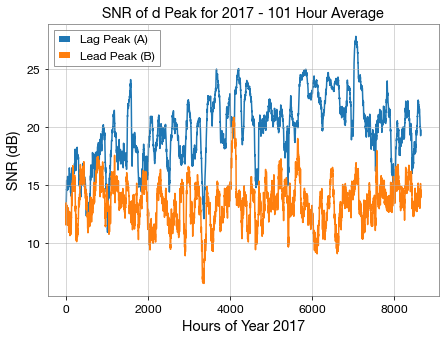

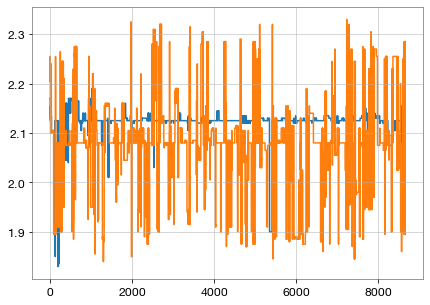

In [84]:
peak = 'd'

SNRA, peak_timeA, noise_A = NCCFs.snr_of_peak_amp(peak+'A')
SNRB, peak_timeB, noise_B = NCCFs.snr_of_peak_amp(peak+'B')

fig = plt.figure(figsize=(7,5))
plt.plot(SNRA)
plt.plot(SNRB)
plt.legend(['Lag Peak (A)', 'Lead Peak (B)'])
plt.ylabel('SNR (dB)')
plt.title(f'SNR of {peak} Peak for {year} - 101 Hour Average')
plt.xlabel('Hours of Year 2017')
filename = f'longterm_SNR_figures/SNR_for_{peak}_{year}.png'
fig.savefig(filename, dpi=400)

fig2 = plt.figure(figsize=(7,5))
plt.plot(-peak_timeA)
plt.plot(peak_timeB)

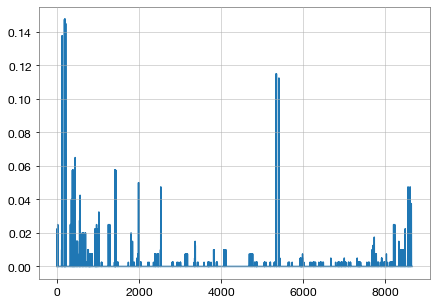

In [83]:
fig3 = plt.figure(figsize=(7,5))
plt.plot(np.abs(np.gradient(peak_timeA)))

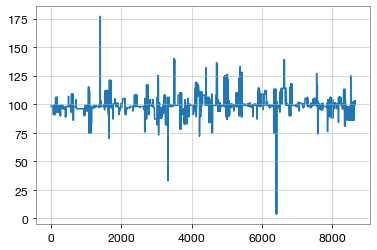

In [64]:
plt.plot(peak_idxA)

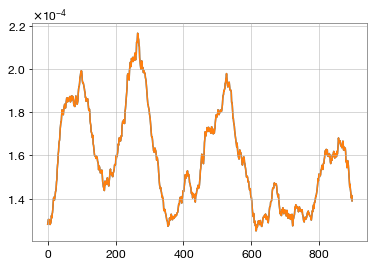

In [117]:
plt.plot(noise_A)
plt.plot(noise_B)

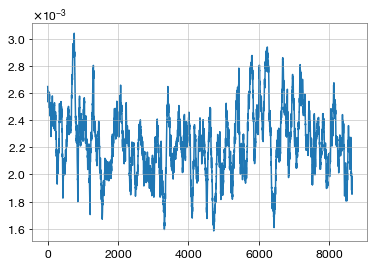

In [23]:
snr,peak_idx,noise_std = NCCFs.snr_of_peak_amp('s1b0A')

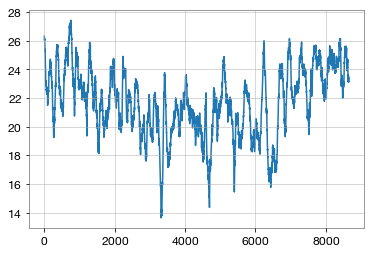

In [24]:
plt.plot(snr)

In [47]:
Ts = 3600
Fs = 1/Ts

f = np.linspace(0,Fs,snr.shape[0])
snr_f = np.abs(scipy.fft.fft(snr-np.mean(snr)))

(0.0, 1e-05)

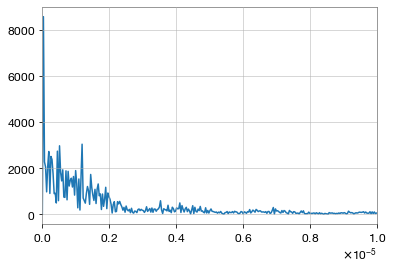

In [50]:
plt.plot(f,snr_f)
plt.xlim([0, 1e-5])

## Copying all NCCFs into single directory